In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

In [3]:
ticker='AAPL'
stock_data=yf.Ticker(ticker)

In [4]:
historical_data=stock_data.history(period='1d',interval='1m')

In [6]:
# Get the latest stock data
print(historical_data.tail())

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-09-10 15:55:00-04:00  220.259995  220.289993  219.679993  220.020004   
2024-09-10 15:56:00-04:00  220.020004  220.240005  219.919998  220.220001   
2024-09-10 15:57:00-04:00  220.210007  220.250000  219.949997  220.199997   
2024-09-10 15:58:00-04:00  220.190002  220.304993  220.110001  220.270004   
2024-09-10 15:59:00-04:00  220.274994  220.369995  220.039993  220.169998   

                           Volume  Dividends  Stock Splits  
Datetime                                                    
2024-09-10 15:55:00-04:00  541946        0.0           0.0  
2024-09-10 15:56:00-04:00  257148        0.0           0.0  
2024-09-10 15:57:00-04:00  395571        0.0           0.0  
2024-09-10 15:58:00-04:00  292468        0.0           0.0  
2024-09-10 15:59:00-04:00  691118        0.0           0.0  


In [7]:
# Check all available keys in the info dictionary
print("Available keys in stock data info:")
print(stock_data.info.keys())

Available keys in stock data info:
dict_keys(['address1', 'city', 'state', 'zip', 'country', 'phone', 'website', 'industry', 'industryKey', 'industryDisp', 'sector', 'sectorKey', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'irWebsite', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'tra

In [ ]:
# Get the real-time stock price (with a fallback)
if 'regularMarketPrice' in stock_data.info:
    current_price = stock_data.info['regularMarketPrice']
    print(f"Current {ticker} Stock Price: ${current_price}")
else:
    print(f"Real-time price for {ticker} is not available.")

In [ ]:
# Get the real-time stock price
current_price = stock_data.info['bid']
print(f"Current {ticker} Stock Price: ${current_price}")

In [ ]:
# Get real-time volume
current_volume = stock_data.info['volume']
print(f"Current {ticker} Volume: {current_volume}")

In [ ]:
pip install beautifulsoup4 requests pandas

In [40]:
import requests

In [41]:
# Define the URL of the news website
url = 'https://finance.yahoo.com/topic/stock-market-news'

# Send a GET request to fetch the page content
response = requests.get(url)

In [42]:
# Check if the request was successful
if response.status_code == 200:
    print("Page successfully fetched!")
else:
    print("Failed to retrieve the page")

Page successfully fetched!


In [ ]:
from bs4 import BeautifulSoup

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Print the parsed HTML to examine the structure
print(soup.prettify()) 

In [44]:
# Find all the news articles (headlines, summaries, links)
articles = soup.find_all('h3', class_='Mb(5px)')

# Initialize lists to store extracted data
news_headlines = []
news_links = []

# Loop through each article and extract headline and link
for article in articles:
    headline = article.get_text()
    link = article.find('a')['href']
    
    # Append the headline and the full link to the lists
    news_headlines.append(headline)
    news_links.append('https://finance.yahoo.com' + link)

# Print extracted headlines and links
for i in range(len(news_headlines)):
    print(f"Headline: {news_headlines[i]}")
    print(f"Link: {news_links[i]}")
    print("\n")


Headline: Huawei Targets iPhone's Premium Market with $2,800 Foldable Mate XT Launch: Report
Link: https://finance.yahoo.comhttps://finance.yahoo.com/news/huawei-targets-iphones-premium-market-130941827.html


Headline: These Billionaires Made Big Bets on These AI Stocks, but Should You Buy Them?
Link: https://finance.yahoo.comhttps://finance.yahoo.com/news/billionaires-made-big-bets-ai-130200770.html


Headline: Watch These Arm Holdings Price Levels as Stock Rallies
Link: https://finance.yahoo.comhttps://finance.yahoo.com/news/watch-arm-holdings-price-levels-125003661.html


Headline: US Futures Tick Higher Before Debate, Inflation: Markets Wrap
Link: https://finance.yahoo.comhttps://finance.yahoo.com/news/asian-stocks-poised-track-wall-222728015.html


Headline: What's Going On With Bank Of America Stock On Tuesday?
Link: https://finance.yahoo.comhttps://finance.yahoo.com/news/whats-going-bank-america-stock-124253369.html


Headline: Amazon Targets Walmart's Grocery Market with Expan

In [45]:
import pandas as pd

# Create a DataFrame with the extracted data
news_df = pd.DataFrame({
    'Headline': news_headlines,
    'Link': news_links
})

# Show the DataFrame
print(news_df)

# Save the DataFrame to a CSV file
news_df.to_csv('yahoo_finance_news.csv', index=False)


                                            Headline  \
0  Huawei Targets iPhone's Premium Market with $2...   
1  These Billionaires Made Big Bets on These AI S...   
2  Watch These Arm Holdings Price Levels as Stock...   
3  US Futures Tick Higher Before Debate, Inflatio...   
4  What's Going On With Bank Of America Stock On ...   
5  Amazon Targets Walmart's Grocery Market with E...   
6                 Is Meta Platforms Stock a Buy Now?   
7  Nvidia’s Blackwell Chip Delay Is Center Stage ...   
8  Analyst revisits Apple stock price target afte...   
9  Stocks Edge Down Pre-Bell Ahead of Latest Infl...   

                                                Link  
0  https://finance.yahoo.comhttps://finance.yahoo...  
1  https://finance.yahoo.comhttps://finance.yahoo...  
2  https://finance.yahoo.comhttps://finance.yahoo...  
3  https://finance.yahoo.comhttps://finance.yahoo...  
4  https://finance.yahoo.comhttps://finance.yahoo...  
5  https://finance.yahoo.comhttps://finance.yahoo... 

In [46]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
# Import necessary modules
import nltk
nltk.download('brown')
nltk.download('punkt')


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
from textblob import TextBlob

# Perform sentiment analysis on each headline
news_df['Sentiment'] = news_df['Headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the headlines with their corresponding sentiment scores
print(news_df[['Headline', 'Sentiment']])


                                            Headline  Sentiment
0  Huawei Targets iPhone's Premium Market with $2...   0.000000
1  These Billionaires Made Big Bets on These AI S...   0.000000
2  Watch These Arm Holdings Price Levels as Stock...   0.000000
3  US Futures Tick Higher Before Debate, Inflatio...   0.250000
4  What's Going On With Bank Of America Stock On ...   0.000000
5  Amazon Targets Walmart's Grocery Market with E...   0.000000
6                 Is Meta Platforms Stock a Buy Now?   0.000000
7  Nvidia’s Blackwell Chip Delay Is Center Stage ...  -0.100000
8  Analyst revisits Apple stock price target afte...   0.000000
9  Stocks Edge Down Pre-Bell Ahead of Latest Infl...   0.172222


In [49]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import tweepy

# Replace these with your actual Twitter API credentials
API_KEY = 'TZiBiJxFkXUbYmAeABPnTPC7n'
API_SECRET_KEY = 'C1pXY5dR2E7aW65dxMYUK9jrF3lz3JwHOldBkzgsdrrIAL7fFe'
ACCESS_TOKEN = '1833393276889579520-mNI5JBa2CTM8ftfFYFNpNG4FeN8IJC'
ACCESS_TOKEN_SECRET = 'JHOYu27ScvqWVfrs6vJAK7gVouSS5W99Cax54sdiF0qHO'




In [51]:
# Set up Tweepy authentication
auth = tweepy.OAuth1UserHandler('TZiBiJxFkXUbYmAeABPnTPC7n','C1pXY5dR2E7aW65dxMYUK9jrF3lz3JwHOldBkzgsdrrIAL7fFe','1833393276889579520-mNI5JBa2CTM8ftfFYFNpNG4FeN8IJC', 'JHOYu27ScvqWVfrs6vJAK7gVouSS5W99Cax54sdiF0qHO')
api = tweepy.API(auth)


In [52]:

# Define stock-related hashtags or tickers
search_query = '$AAPL OR $TSLA'

In [53]:
# Fetch tweets related to the stock
tweets = tweepy.Cursor(api.search_tweets, q=search_query, lang='en', result_type='recent').items(50)


In [54]:
# Extract tweet text
for tweet in tweets:
    print(tweet.text)

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\tweepy\api.py:301: SyntaxWarning:

invalid escape sequence '\['

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\tweepy\api.py:341: SyntaxWarning:

invalid escape sequence '\['

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\tweepy\api.py:376: SyntaxWarning:

invalid escape sequence '\['

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\tweepy\api.py:426: SyntaxWarning:

invalid escape sequence '\['

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\tweepy\api.py:467: SyntaxWarning:

invalid escape sequence '\['

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\tweepy\api.py:599: SyntaxWarning:

invalid escape sequence '\['

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\tweepy\api.py:634: SyntaxWarning:

invalid escape sequence '\['

C:\Users\ASUS\AppData\Local\Programs\Pyth

Forbidden: 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product

In [ ]:
pip install yfinance plotly pandas numpy

In [ ]:
import yfinance as yf
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from datetime import datetime, timedelta


In [55]:
# Function to get stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Define the ticker and date range
ticker = 'AAPL'
start_date = datetime.now() - timedelta(days=365)
end_date = datetime.now()

# Get data
stock_data = get_stock_data(ticker, start_date, end_date)


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Line chart for stock prices
def plot_stock_prices(stock_data):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'],
                             mode='lines', name='Close Price'))

    fig.update_layout(title=f'Live Stock Prices for {ticker}',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      template='plotly_dark')
    
    fig.show()

plot_stock_prices(stock_data)


In [ ]:
# Candlestick chart
def plot_candlestick_chart(stock_data):
    fig = go.Figure()

    fig.add_trace(go.Candlestick(x=stock_data.index,
                                 open=stock_data['Open'],
                                 high=stock_data['High'],
                                 low=stock_data['Low'],
                                 close=stock_data['Close'],
                                 name='Candlestick'))

    fig.update_layout(title=f'Live Candlestick Chart for {ticker}',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      template='plotly_dark')
    
    fig.show()

plot_candlestick_chart(stock_data)


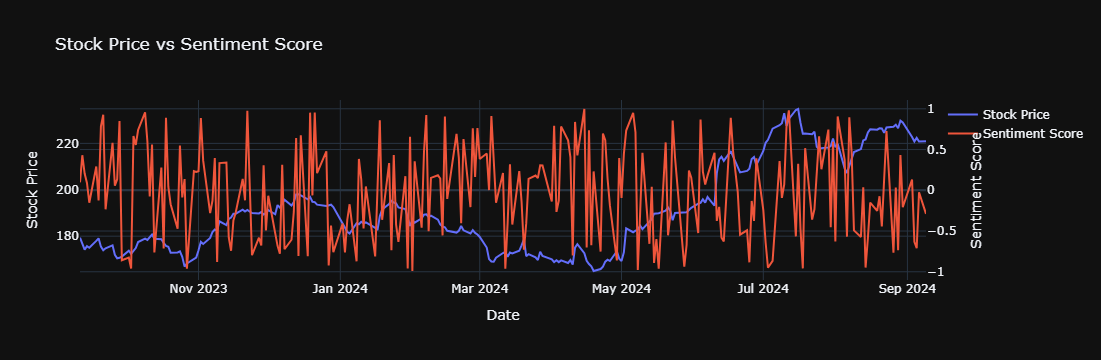

In [58]:
# Example sentiment scores (replace with real data)
np.random.seed(0)
dates = stock_data.index
sentiment_scores = np.random.uniform(-1, 1, len(dates))

def plot_sentiment_vs_stock(stock_data, sentiment_scores):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'],
                             mode='lines', name='Stock Price'))
    
    fig.add_trace(go.Scatter(x=stock_data.index, y=sentiment_scores,
                             mode='lines', name='Sentiment Score', yaxis='y2'))

    fig.update_layout(title='Stock Price vs Sentiment Score',
                      xaxis_title='Date',
                      yaxis_title='Stock Price',
                      yaxis2=dict(title='Sentiment Score', overlaying='y', side='right'),
                      template='plotly_dark')
    
    fig.show()

plot_sentiment_vs_stock(stock_data, sentiment_scores)


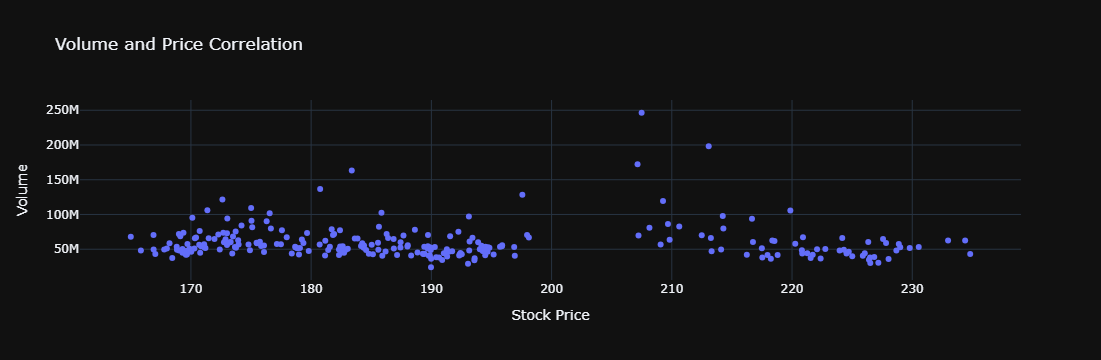

In [59]:
def plot_volume_vs_price(stock_data):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=stock_data['Close'], y=stock_data['Volume'],
                             mode='markers', name='Volume vs Price'))

    fig.update_layout(title='Volume and Price Correlation',
                      xaxis_title='Stock Price',
                      yaxis_title='Volume',
                      template='plotly_dark')
    
    fig.show()

plot_volume_vs_price(stock_data)


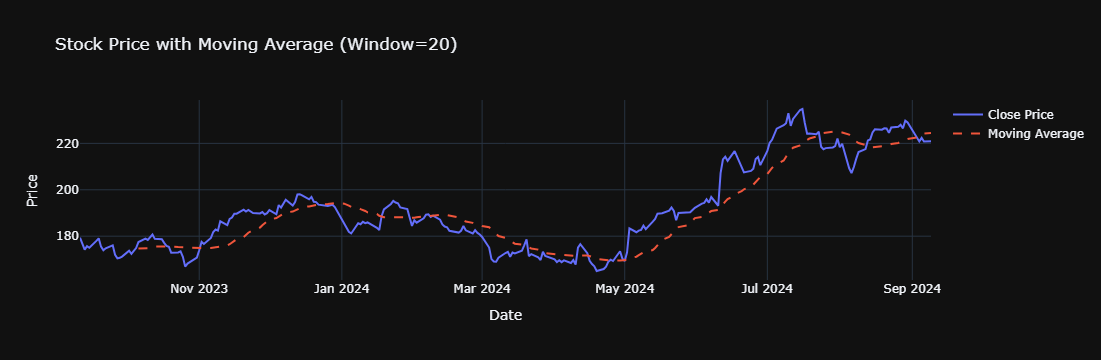

In [60]:
def add_moving_average(stock_data, window=20):
    stock_data['Moving Average'] = stock_data['Close'].rolling(window=window).mean()

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'],
                             mode='lines', name='Close Price'))

    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Moving Average'],
                             mode='lines', name='Moving Average', line=dict(dash='dash')))

    fig.update_layout(title=f'Stock Price with Moving Average (Window={window})',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      template='plotly_dark')
    
    fig.show()

add_moving_average(stock_data)


In [64]:
import ipywidgets as widgets
from IPython.display import display

def update_plots(ticker):
    stock_data = get_stock_data(ticker, start_date, end_date)
    plot_stock_prices(stock_data)
    plot_candlestick_chart(stock_data)
    sentiment_scores = np.random.uniform(-1, 1, len(stock_data.index))  # Example sentiment
    plot_sentiment_vs_stock(stock_data, sentiment_scores)
    plot_volume_vs_price(stock_data)
    add_moving_average(stock_data)

ticker_selector = widgets.Text(value='AAPL', description='Ticker:')
widgets.interactive(update_plots, ticker=ticker_selector)


interactive(children=(Text(value='AAPL', description='Ticker:'), Output()), _dom_classes=('widget-interact',))

In [62]:
def plot_stock_prices(stock_data):
    """
    Plots the closing prices of a stock over time.

    Parameters:
    stock_data (DataFrame): A DataFrame containing stock data with a 'Close' column.

    Returns:
    None
    """
    # Code implementation


In [63]:
pip install notebook


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


SyntaxError: invalid syntax (93904313.py, line 1)

In [ ]:
pip freeze > requirements.txt
